In [35]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/EDA_Pandas_Banking_L1/bank-additional.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/PC/Downloads/bank-additional.csv', sep = ';')
pd.set_option('display.max_columns', None) #show all columns 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [32]:
df.shape

(4119, 21)

In [33]:
df.describe(include= ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Input features (column names):

1. age - client's age in years (numeric)
2. job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, 3. student, technician, unemployed, unknown)
4. marital - marital status (categorical: divorced, married, single, unknown)
5. education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
6. default - has credit in default? (categorical: no, yes, unknown)
7. housing - has housing loan? (categorical: no, yes, unknown)
8. loan - has personal loan? (categorical: no, yes, unknown)
9. contact - contact communication type (categorical: cellular, telephone)
10. month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
11. day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
12. duration - last contact duration, in seconds (numeric).
13. campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
14. pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
15. previous - number of contacts performed for this client before this campaign (numeric)
16. poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
17. emp.var.rate - employment variation rate, quarterly indicator (numeric)
18. cons.price.idx - consumer price index, monthly indicator (numeric)
19. cons.conf.idx - consumer confidence index, monthly indicator (numeric)
20. euribor3m - euribor 3 month rate, daily indicator (numeric)
21. nr.employed - number of employees, quarterly indicator (numeric)
Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [36]:
#y means for has client subscribe the term deposit?
df['y'].value_counts(normalize=True)

no     0.890507
yes    0.109493
Name: y, dtype: float64

In [37]:
df['marital'].value_counts(normalize=True)

married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: marital, dtype: float64

In [38]:
df.sort_values(['age','duration'], ascending=[True, False])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,385,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,297,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,183,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,338,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,410,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,82,housemaid,married,basic.4y,no,no,no,telephone,sep,tue,279,3,3,2,success,-1.1,94.199,-37.5,0.877,4963.6,yes
1123,85,housemaid,divorced,basic.4y,unknown,yes,no,telephone,oct,fri,181,2,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,no
1796,86,retired,married,unknown,unknown,yes,no,cellular,sep,tue,340,1,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes
696,86,retired,married,unknown,unknown,yes,yes,cellular,sep,tue,211,1,7,4,success,-1.1,94.199,-37.5,0.877,4963.6,yes


We see that the youngest customers are at the age of 18, and the call duration exceeded 5 minutes only for three clients, which indicates the ineffectiveness of long-term interaction with such clients.

Using APPLY AND MAP

In [39]:
df.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

the oldest client is 88 years old and the number of contact on one person can reach to 35 times

The map can also be used for the values replacement in a column by passing it as an argument dictionary in form of {old_value: new_value}.


In [52]:
#change y values yes/no to 0/1 by using map
new={'no':0,'yes':1}
df['y']= df['y'].map(new)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [53]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [54]:
#What are the mean values of numerical features among the attracted clients?
df[df['y'] == 1].mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_19740\2745384249.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['y'] == 1].mean()


age                 41.889135
duration           560.787140
campaign             1.980044
pdays              778.722838
previous             0.585366
emp.var.rate        -1.177384
cons.price.idx      93.417268
cons.conf.idx      -39.786475
euribor3m            2.145448
nr.employed       5093.118625
y                    1.000000
dtype: float64

the avg age is around 42 years old and 2 calls are required to attract them (campaign: 1.98)

In [56]:
#What is the share of clients attracted in our DataFrame?
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 10.9%


In [62]:
#What is the average call duration for the attracted clients?
df[df['y'] ==1].agg({'duration': 'mean', 'age': 'mean', 'campaign': 'mean'})

duration    560.787140
age          41.889135
campaign      1.980044
dtype: float64

In [69]:
a= round(df[df['y']==1]['duration'].mean(),2)
minute= a//60
print('Average call duration attracted client is ', minute, "min", round(a%60,0), "second")
##the floor division // rounds the result down to the nearest whole number

Average call duration attracted client is  9.0 min 21.0 second


In [73]:
#What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?
avg_age= df[(df['y']==1)&(df['marital']=='single')]['age'].mean()
print('Average age of attracted clients is', round(avg_age, 0), "year")

Average age of attracted clients is 33.0 year


If we need to get the first or last line of the DataFrame, we can use the code df[:1] or df[-1:]:

In [76]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,0


Pivot tables

Suppose we want to see how observations in our sample are distributed in the context of two features - y and marital. To do this, we can build cross tabulation by the crosstab method.

In [80]:
pd.crosstab(df['y'],df['marital'], normalize='index')

marital,divorced,married,single,unknown
y,,,,
0,0.109869,0.615322,0.272083,0.002726
1,0.095344,0.558758,0.343681,0.002217


We see that more than half of the clients (61%, column married) are married and have not issued a deposit.

In Pandas, pivot tables are implemented by the method pivot_table with such parameters:

values – a list of variables to calculate the necessary statistics,
index – a list of variables to group data,
aggfunc — values that we actually need to count by groups - the amount, average, maximum, minimum or something else.
Let's find the average age and the call duration for different types of client employment job:

In [87]:
df.pivot_table(values=['age','duration'], index='job', aggfunc='mean')

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


In [88]:
#cach 2
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
)

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


Determine the median age and the number of contacts for different levels of client education.

In [5]:
df.head()
pd.pivot_table(df, values=['age','campaign'], index='education', aggfunc=['mean','count'])

mean           count         
                           age  campaign   age campaign
education                                              
basic.4y             47.657343  2.421911   429      429
basic.6y             40.144737  2.649123   228      228
basic.9y             39.231707  2.348432   574      574
high.school          38.097720  2.630836   921      921
illiterate           42.000000  4.000000     1        1
professional.course  40.207477  2.512150   535      535
university.degree    39.017405  2.583070  1264     1264
unknown              42.826347  2.538922   167      167

Output box plot to analyze the client age distribution by their education level.



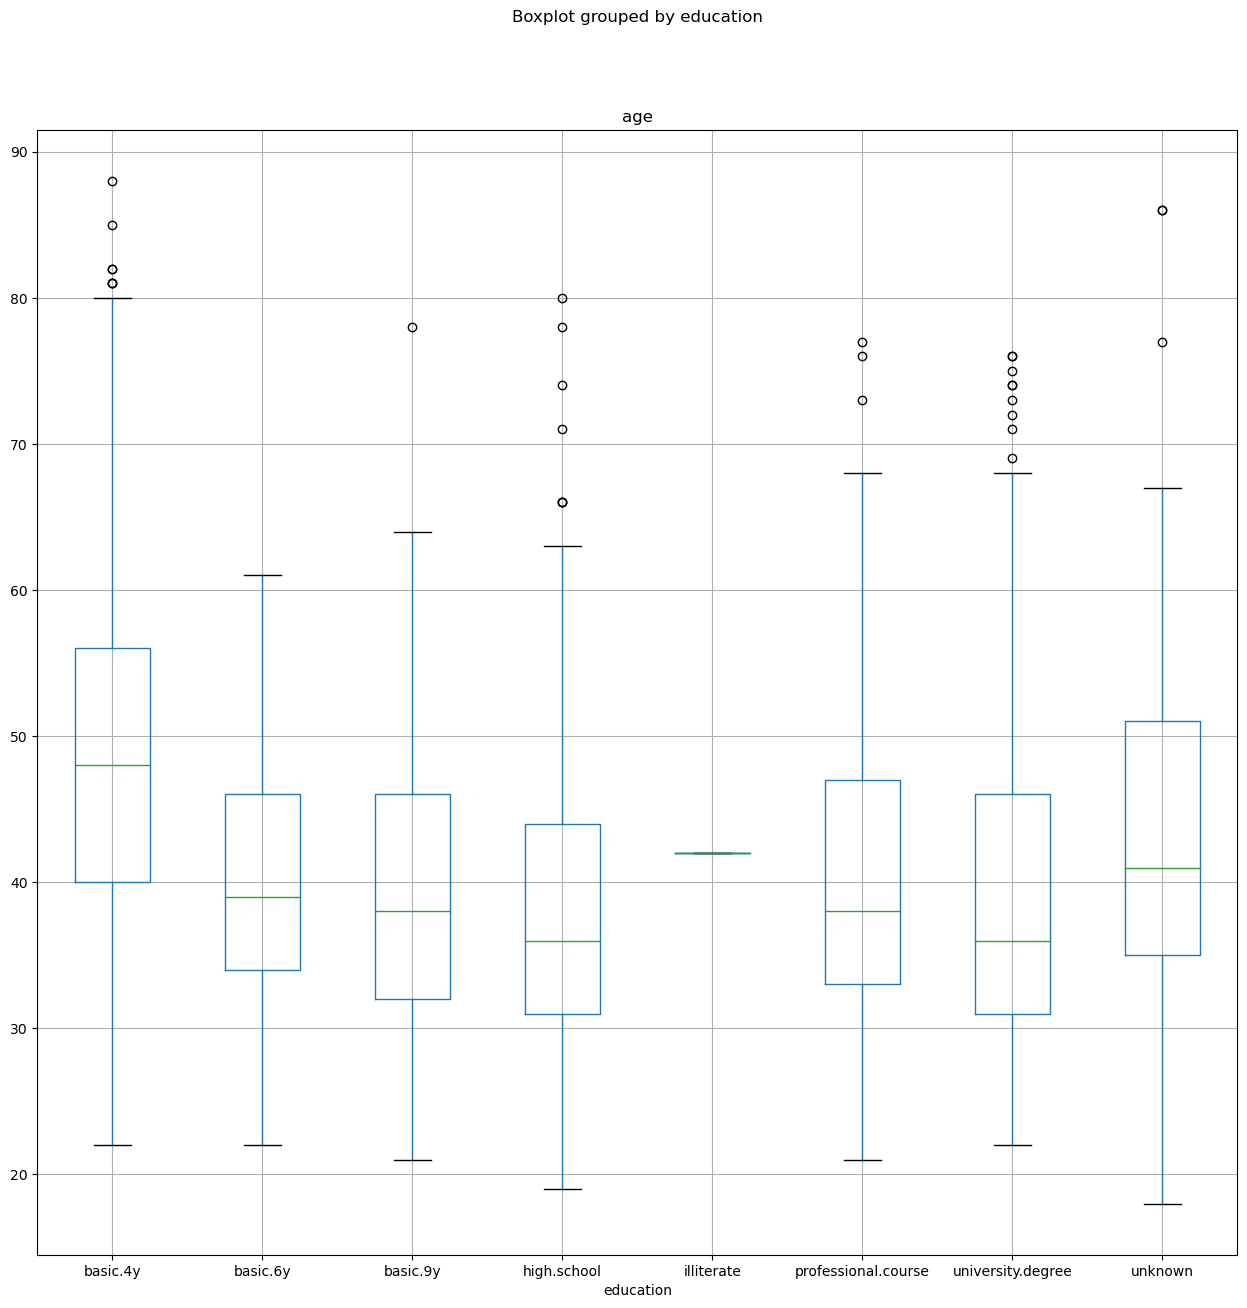

In [32]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

<Axes: >

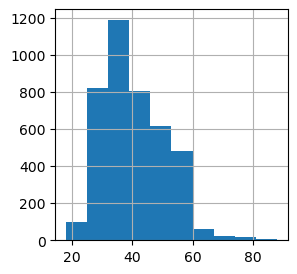

In [24]:
df['age'].hist(figsize=(3,3))

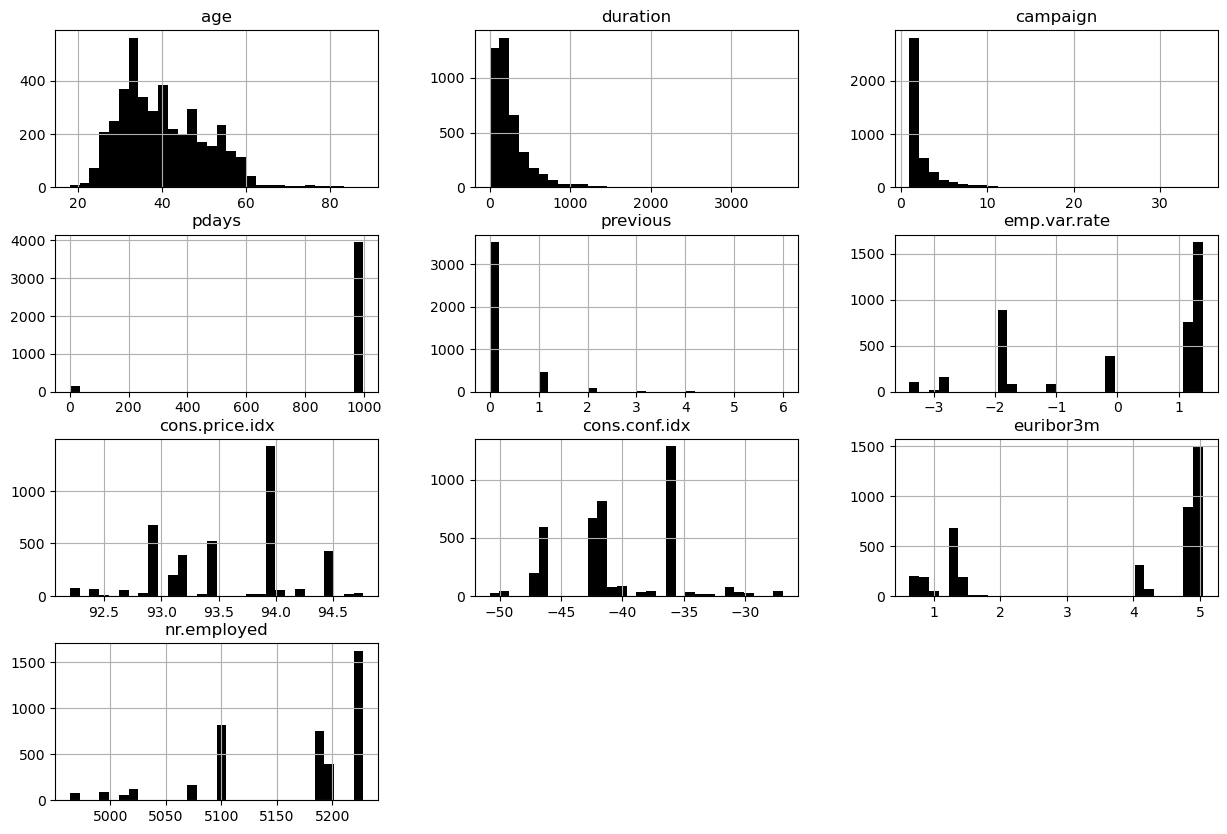

In [33]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()